In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import talib as ta
from sklearn import neighbors
from sklearn import svm
from collections import Counter
from sklearn.preprocessing import StandardScaler

import math

In [2]:
df = pd.read_csv("Crude Oil - MCX.csv")
df = df.drop(df.columns[[0]], axis=1)
df.head()

,Uopen,Ulow,Uhigh,Uclose
0,6054,6026,6073,6047
1,6074,5968,6088,5997
2,6019,6019,6098,6088
3,6095,6091,6231,6221
4,6230,6197,6264,6209


In [3]:
N = 2
w = 2*N + 1

for i in range(0,df.shape[0]-1):
    df.loc[df.index[i],'c'] = df['Uclose'][i] - df['Uclose'][i+1]
    
df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c
0,6054,6026,6073,6047,50.0
1,6074,5968,6088,5997,-91.0
2,6019,6019,6098,6088,-133.0
3,6095,6091,6231,6221,12.0
4,6230,6197,6264,6209,1.0
5,6208,6208,6208,6208,-51.0
6,6197,6177,6273,6259,78.0
7,6196,6175,6254,6181,-18.0
8,6170,6148,6215,6199,41.0
9,6210,6152,6225,6158,8.0


In [4]:
for i in range(0,df.shape[0]-(2*N+1)):
    s = 0
    for j in range((2*N)+1):
        s += df['Uclose'][i+j]
    s = s*1.0
    s = s/((2*N)+1)
    df.loc[df.index[i+N],'ma'] = s

df.head()

,Uopen,Ulow,Uhigh,Uclose,c,ma
0,6054,6026,6073,6047,50.0,NaN
1,6074,5968,6088,5997,-91.0,NaN
2,6019,6019,6098,6088,-133.0,6112.4
3,6095,6091,6231,6221,12.0,6144.6
4,6230,6197,6264,6209,1.0,6197.0


In [5]:
for i in range(0,df.shape[0]-N):
    h = df['Uhigh'][i]
    l = df['Ulow'][i]
    for j in range(N):
        if h<df['Uhigh'][i+j]:
            h = df['Uhigh'][i+j]
        if l>df['Ulow'][i+j]:
            l = df['Ulow'][i+j]
    R = (h - df['Uclose'][i+N])*(-100)/(h-l)
    df.loc[df.index[i+N],'R'] = R
    

df.head()

,Uopen,Ulow,Uhigh,Uclose,c,ma,R
0,6054,6026,6073,6047,50.0,NaN,NaN
1,6074,5968,6088,5997,-91.0,NaN,NaN
2,6019,6019,6098,6088,-133.0,6112.4,0.000000
3,6095,6091,6231,6221,12.0,6144.6,94.615385
4,6230,6197,6264,6209,1.0,6197.0,-10.377358


In [6]:
for i in range(0,df.shape[0]-N):
    h = 0
    l = 0
    vr = 0
    for j in range(N):
        h += df['Uhigh'][i+j]
        l += df['Ulow'][i+j]
    h = h*1.0/N
    l = l*1.0/N
    x = (df['Uhigh'][i+N] + df['Uclose'][i+N-1])/2
    y = (df['Ulow'][i+N] + df['Uclose'][i+N-1])/2
    if x!=y:
        vr = (h-l)*1.0/(x-y)
    df.loc[df.index[i+N],'VR'] = vr
    

df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR
0,6054,6026,6073,6047,50.0,NaN,NaN,NaN
1,6074,5968,6088,5997,-91.0,NaN,NaN,NaN
2,6019,6019,6098,6088,-133.0,6112.4,0.000000,2.113924
3,6095,6091,6231,6221,12.0,6144.6,94.615385,1.421429
4,6230,6197,6264,6209,1.0,6197.0,-10.377358,3.268657
5,6208,6208,6208,6208,-51.0,6215.6,-32.369942,0.000000
6,6197,6177,6273,6259,78.0,6211.2,-7.462687,0.697917
7,6196,6175,6254,6181,-18.0,6201.0,-95.833333,1.215190
8,6170,6148,6215,6199,41.0,6189.4,-75.510204,2.611940
9,6210,6152,6225,6158,8.0,6167.0,-90.566038,2.000000


In [7]:
# df['RSI'] = ta.RSI(df['Uclose'].values, timeperiod = N)

# df.head(10)

In [8]:
df['EMA'] = df.iloc[:,3].ewm(span=N,adjust=False).mean()

df.head()

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA
0,6054,6026,6073,6047,50.0,NaN,NaN,NaN,6047.000000
1,6074,5968,6088,5997,-91.0,NaN,NaN,NaN,6013.666667
2,6019,6019,6098,6088,-133.0,6112.4,0.000000,2.113924,6063.222222
3,6095,6091,6231,6221,12.0,6144.6,94.615385,1.421429,6168.407407
4,6230,6197,6264,6209,1.0,6197.0,-10.377358,3.268657,6195.469136


In [9]:
M = pd.Series(df['Uclose'].diff(1))  
aM = abs(M) 
r = N+1
s = N+1
EMA1 = M.ewm(span = r, min_periods = r - 1).mean()  
aEMA1 = aM.ewm(span = r, min_periods = r - 1).mean()
EMA2 = EMA1.ewm(span = s, min_periods = s - 1).mean() 
aEMA2 = aEMA1.ewm(span = s, min_periods = s - 1).mean()
TSI = pd.Series(EMA2 / aEMA2, name = 'TSI_' + str(r) + '_' + str(s))  
df['TSI'] = TSI

df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA,TSI
0,6054,6026,6073,6047,50.0,NaN,NaN,NaN,6047.000000,NaN
1,6074,5968,6088,5997,-91.0,NaN,NaN,NaN,6013.666667,NaN
2,6019,6019,6098,6088,-133.0,6112.4,0.000000,2.113924,6063.222222,NaN
3,6095,6091,6231,6221,12.0,6144.6,94.615385,1.421429,6168.407407,0.790593
4,6230,6197,6264,6209,1.0,6197.0,-10.377358,3.268657,6195.469136,0.733745
5,6208,6208,6208,6208,-51.0,6215.6,-32.369942,0.000000,6203.823045,0.702558
6,6197,6177,6273,6259,78.0,6211.2,-7.462687,0.697917,6240.607682,0.779772
7,6196,6175,6254,6181,-18.0,6201.0,-95.833333,1.215190,6200.869227,0.114339
8,6170,6148,6215,6199,41.0,6189.4,-75.510204,2.611940,6199.623076,0.043266
9,6210,6152,6225,6158,8.0,6167.0,-90.566038,2.000000,6171.874359,-0.231640


In [10]:
for i in range(0,df.shape[0]-N-1):
    bs = ''
    for j in range(N+1):
        if df['c'][i+j]>=0:
            bs+= '0'
        else:
            bs+= '1' 
    bs = int(bs, 2)
    if(bs < 2**N):
        bs=0
    else:
        bs=1
    df.loc[df.index[i+N],'y'] = bs

df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA,TSI,y
0,6054,6026,6073,6047,50.0,NaN,NaN,NaN,6047.000000,NaN,NaN
1,6074,5968,6088,5997,-91.0,NaN,NaN,NaN,6013.666667,NaN,NaN
2,6019,6019,6098,6088,-133.0,6112.4,0.000000,2.113924,6063.222222,NaN,0.0
3,6095,6091,6231,6221,12.0,6144.6,94.615385,1.421429,6168.407407,0.790593,1.0
4,6230,6197,6264,6209,1.0,6197.0,-10.377358,3.268657,6195.469136,0.733745,1.0
5,6208,6208,6208,6208,-51.0,6215.6,-32.369942,0.000000,6203.823045,0.702558,0.0
6,6197,6177,6273,6259,78.0,6211.2,-7.462687,0.697917,6240.607682,0.779772,0.0
7,6196,6175,6254,6181,-18.0,6201.0,-95.833333,1.215190,6200.869227,0.114339,1.0
8,6170,6148,6215,6199,41.0,6189.4,-75.510204,2.611940,6199.623076,0.043266,0.0
9,6210,6152,6225,6158,8.0,6167.0,-90.566038,2.000000,6171.874359,-0.231640,1.0


In [11]:
df

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA,TSI,y
0,6054,6026,6073,6047,50.0,NaN,NaN,NaN,6047.000000,NaN,NaN
1,6074,5968,6088,5997,-91.0,NaN,NaN,NaN,6013.666667,NaN,NaN
2,6019,6019,6098,6088,-133.0,6112.4,0.000000,2.113924,6063.222222,NaN,0.0
3,6095,6091,6231,6221,12.0,6144.6,94.615385,1.421429,6168.407407,0.790593,1.0
4,6230,6197,6264,6209,1.0,6197.0,-10.377358,3.268657,6195.469136,0.733745,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1686,3885,3862,3907,3894,59.0,3870.0,-38.400000,2.800000,3893.337433,0.334167,1.0
1687,3859,3769,3865,3835,-4.0,3874.2,-133.750000,1.020833,3854.445811,-0.183479,0.0
1688,3822,3793,3869,3839,-54.0,NaN,-49.275362,1.855263,3844.148604,-0.289532,0.0
1689,3858,3802,3904,3893,66.0,NaN,24.000000,1.686275,3876.716201,0.173070,1.0


In [12]:
df = df.iloc[4:]
df = df.iloc[:2455]


In [13]:
df.isnull().sum()

Uopen     0
Ulow      0
Uhigh     0
Uclose    0
c         1
ma        3
R         0
VR        0
EMA       0
TSI       0
y         1
dtype: int64

In [14]:
# X = df.iloc[:, 5:-1]
# y = df.iloc[:, -1]
# split = int(len(df)*0.85)
# X_train, X_test, y_train, y_test = X[:split], X[split:split+365], y[:split], y[split:split+365]
# clf = svm.SVC(kernel = 'poly')
# clf.fit(X_train, y_train)
# confidence = clf.score(X_test, y_test)
# print('accuracy:',confidence)
# predictions = clf.predict(X_test)
# print('predicted class counts:',Counter(predictions))

In [15]:
X = df.iloc[:, 5:-1]
y = df.iloc[:, -1]
# split = int(len(df)*0.85)
# X_train, X_test, y_train, y_test = X[:split], X[split:split+365], y[:split], y[split:split+365]

# # sc = StandardScaler()
# # X_train = sc.fit_transform(X_train)
# # X_test = sc.transform(X_test)

# clf = svm.SVC(kernel = 'poly')
# clf.fit(X_train, y_train)
# confidence = clf.score(X_test, y_test)
# print('accuracy:',confidence)
# predictions = clf.predict(X_test)
# print('predicted class counts:',Counter(predictions))
# print(df['c'][1000])
confidence = 0
k=3
clf = svm.SVC(kernel = 'poly')
clf2 = neighbors.KNeighborsClassifier(k)
w=60
predicted_price = []
actual_price = []
days = 1
i=0
while(i<1680):
    if(i+w+days<=1680):
        value=[]
        X_train, y_train = X[i:i+w], y[i:i+w]
        clf.fit(X_train, y_train)
        for k in range(days):
            X_test, y_test = X[i+w+k:i+w+k+1], y[i+w+k:i+w+k+1]
            val=clf.score(X_test, y_test)
            value.append(val)
        
#         confidence +=value

        predictions = clf.predict(X_test)
        clf2.fit(X_train, y_train)
        for k in range(days):
            sum2=0
            count=0
            deltac=0
            for j in range(w):
                if(df['y'][i+j+6]==value[k]):
                    count+=1
                    sum2+=df['c'][i+j+6]
            deltac=sum2/count;
            predicted_price.append(df['Uclose'][i+w+5+k]+deltac)
            actual_price.append(df['Uclose'][i+w+6+k])
            print(str(df['Uclose'][i+w+6+k]) + " entry is " + str(df['Uclose'][i+w+5+k]+deltac))
        i=i+days
            
    else:
        break
        


5382 entry is 5502.541666666667
5264 entry is 5395.777777777777
5284 entry is 5283.086956521739
5219 entry is 5303.086956521739
5122 entry is 5241.95652173913
5109 entry is 5135.783783783784
5095 entry is 5131.95652173913
5079 entry is 5117.95652173913
5025 entry is 5101.95652173913
5002 entry is 5047.95652173913
5026 entry is 5024.95652173913
4968 entry is 5048.95652173913
4979 entry is 4989.541666666667
4985 entry is 4991.054054054054
5083 entry is 5002.833333333333
5017 entry is 5096.222222222223
4931 entry is 5030.222222222223
4963 entry is 4944.361111111111
4721 entry is 4986.625
4833 entry is 4738.666666666667
4814 entry is 4849.416666666667
4861 entry is 4829.08
4783 entry is 4878.028571428571
4773 entry is 4796.2
4756 entry is 4791.828571428571
4641 entry is 4769.2
4662 entry is 4654.916666666667
4664 entry is 4675.916666666667
4656 entry is 4677.291666666667
4607 entry is 4675.444444444444
4637 entry is 4627.555555555556
4680 entry is 4656.304347826087
4697 entry is 4691.78260

2480 entry is 2501.4615384615386
2465 entry is 2499.5238095238096
2407 entry is 2474.7
2291 entry is 2421.0
2254 entry is 2305.0
2244 entry is 2266.2105263157896
2089 entry is 2256.2105263157896
2030 entry is 2101.2105263157896
2051 entry is 2043.8333333333333
2113 entry is 2064.8333333333335
1996 entry is 2132.1666666666665
1962 entry is 2010.2926829268292
1950 entry is 1975.3658536585365
1919 entry is 1969.9473684210527
2055 entry is 1938.9473684210527
2158 entry is 2074.9473684210525
2100 entry is 2183.1052631578946
2202 entry is 2111.9756097560976
2287 entry is 2211.6666666666665
2286 entry is 2311.5263157894738
2153 entry is 2293.243902439024
2069 entry is 2160.121951219512
2170 entry is 2100.0
2181 entry is 2201.0
2157 entry is 2211.65
2048 entry is 2160.05
1939 entry is 2051.725
1899 entry is 1969.05
1844 entry is 1929.05
2006 entry is 1874.0526315789473
2037 entry is 2036.0526315789473
1992 entry is 2067.8
2114 entry is 1997.6410256410256
2125 entry is 2119.225
2029 entry is 21

3167 entry is 3118.5925925925926
3211 entry is 3173.5925925925926
3269 entry is 3216.5925925925926
3284 entry is 3275.75
3277 entry is 3290.75
3325 entry is 3283.75
3332 entry is 3331.3333333333335
3351 entry is 3330.3214285714284
3359 entry is 3360.967741935484
3424 entry is 3368.967741935484
3448 entry is 3433.967741935484
3444 entry is 3458.8333333333335
3420 entry is 3451.9310344827586
3399 entry is 3414.733333333333
3399 entry is 3412.233333333333
3288 entry is 3393.733333333333
3301 entry is 3283.5172413793102
3208 entry is 3296.5172413793102
3190 entry is 3203.4137931034484
3183 entry is 3207.1290322580644
3199 entry is 3178.4137931034484
3147 entry is 3194.4137931034484
3174 entry is 3142.4827586206898
3142 entry is 3193.451612903226
3087 entry is 3138.1724137931033
3067 entry is 3104.548387096774
2931 entry is 3063.1724137931033
2969 entry is 2927.1724137931033
2980 entry is 2967.3571428571427
2969 entry is 2976.464285714286
3083 entry is 2990.09375
3089 entry is 3103.46875
30

4929 entry is 4901.742857142857
4913 entry is 4911.257142857143
4859 entry is 4895.971428571429
4597 entry is 4841.971428571429
4508 entry is 4600.32
4527 entry is 4513.76
4614 entry is 4529.192307692308
4517 entry is 4616.192307692308
4428 entry is 4502.0
4351 entry is 4413.0
4392 entry is 4355.4
4342 entry is 4398.153846153846
4443 entry is 4349.56
4445 entry is 4423.457142857143
4472 entry is 4453.92
4478 entry is 4453.085714285714
4506 entry is 4461.714285714285
4517 entry is 4489.861111111111
4435 entry is 4501.75
4481 entry is 4420.277777777777
4419 entry is 4466.277777777777
4486 entry is 4433.916666666667
4496 entry is 4469.0
4672 entry is 4511.217391304348
4658 entry is 4651.631578947368
4815 entry is 4633.894736842105
5028 entry is 4790.894736842105
5075 entry is 5027.954545454545
5086 entry is 5050.128205128205
5109 entry is 5062.7692307692305
5080 entry is 5087.075
5126 entry is 5059.575
5039 entry is 5105.25641025641
5075 entry is 5045.285714285715
5049 entry is 5052.47368

3947 entry is 4096.566666666667
3916 entry is 3958.2258064516127
3815 entry is 3929.035714285714
3800 entry is 3828.814814814815
3894 entry is 3813.814814814815
3916 entry is 3910.576923076923
3908 entry is 3932.259259259259
3908 entry is 3910.2727272727275
3869 entry is 3912.3636363636365
3905 entry is 3879.8888888888887
3987 entry is 3913.153846153846
4032 entry is 3996.1153846153848
3790 entry is 4033.757575757576
3891 entry is 3791.757575757576
3903 entry is 3891.969696969697
3858 entry is 3918.0714285714284
3641 entry is 3860.7741935483873
3696 entry is 3641.96875
3892 entry is 3721.5185185185187
3906 entry is 3914.925925925926
4037 entry is 3902.5625
3914 entry is 4028.967741935484
3896 entry is 3905.967741935484
3997 entry is 3885.8387096774195
4021 entry is 4010.4137931034484
4015 entry is 4012.032258064516
4016 entry is 4028.0344827586205
3863 entry is 4024.964285714286
3868 entry is 3852.064516129032
3910 entry is 3853.7741935483873
4019 entry is 3914.5666666666666
4042 entry

3194 entry is 3129.5675675675675
3193 entry is 3169.391304347826
3202 entry is 3168.391304347826
3211 entry is 3198.6486486486488
3155 entry is 3187.2272727272725
3166 entry is 3155.684210526316
3226 entry is 3166.684210526316
3235 entry is 3203.0
3172 entry is 3238.9736842105262
3149 entry is 3181.1315789473683
3145 entry is 3155.4594594594596
3145 entry is 3124.0833333333335
3059 entry is 3130.8333333333335
3044 entry is 3046.0
2903 entry is 3036.923076923077
2899 entry is 2897.8846153846152
2705 entry is 2906.923076923077
2804 entry is 2708.962962962963
2765 entry is 2809.214285714286
2743 entry is 2772.8888888888887
2748 entry is 2746.375
2828 entry is 2752.4137931034484
2940 entry is 2832.4137931034484
3024 entry is 2944.4137931034484
2993 entry is 3018.5625
2857 entry is 2994.75
2920 entry is 2858.75
2947 entry is 2920.4137931034484
2973 entry is 2947.4137931034484
2969 entry is 2974.34375
2989 entry is 2970.0
2877 entry is 2990.6774193548385
2934 entry is 2881.6206896551726
2837

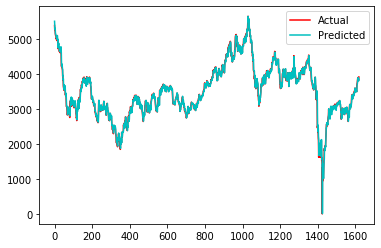

In [16]:
plt.plot(actual_price, "r", label = "Actual")
plt.plot(predicted_price, "c", label = "Predicted")
plt.legend()
plt.show()

In [17]:
rmse = 0
for i in range(len(actual_price)):
    rmse += (actual_price[i] - predicted_price[i])**2
rmse = rmse/len(actual_price)
rmse = math.sqrt(rmse)

print(rmse)

99.9899526856502


In [18]:
mape = 0
for i in range(len(actual_price)):
    mape += abs((actual_price[i] - predicted_price[i])/actual_price[i])
mape = rmse/len(actual_price)

print(mape*100)

6.172219301583345
